Heatmap
==

In [1]:
data_files = []
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/ink_v_ink/ink_v_ink_log_1e-05_tus.csv')
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/paper_v_paper/paper_v_paper_log_1e-05_tus.csv')
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv')

In [2]:
peaks = [
    113.9639,
    130.5259,
    207.0654,
    208.0688,
    230.9904,
    243.0993,
    258.0286,
    272.0655,
    283.1178,
    284.1214,
    305.0996,
    305.1281,
    327.0782,
    328.0816,
    328.1794,
    344.1049,
    345.1081,
    349.0602,
    364.9642,
    377.2091,
]

In [3]:
import csv
data = {}
heads = {}
for fi in data_files:
    with open(fi,'r') as f:
        reader = csv.reader(f)
        heads[fi] = reader.next()
        data[fi] = {}
        for row in reader:
            data[fi][row[0]]=row

In [4]:
import numpy as np
found = []
plot_data = []
for fi in data:
    for mz,row in data[fi].items():
        f = filter(lambda x: mz.startswith(str(x)[:-1]),peaks)
        if len(f) == 1 and not mz in found:
#             print f
#         if float(row[-1]) <= 0.05 and not mz in found:
            plot_data.append(data['/home/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv'][mz][1:-3])
            found.append(mz)
new_plot = []
for row in plot_data:
    new_row = []
    for r in row:
        if not r == 'nan':
            new_row.append(float(r))
        else:
            new_row.append(0.0)
    mnr = max(new_row)
    new_row = [m/mnr for m in new_row]
    new_plot.append(new_row)
new_plot = np.array(new_plot)

print sorted([float(x) for x in found])
print sorted(peaks)
print len(found),len(peaks)

[113.96390857609977, 130.52593666426978, 207.06541002325974, 208.0687948897043, 230.9904123252886, 243.09934515879692, 258.0286347444263, 272.0655014873042, 283.1177664655883, 284.12135756014277, 305.0996424997124, 305.1281140004943, 327.0782204558983, 328.0816026655655, 328.17935362585155, 344.1048564438347, 345.1080984823646, 349.0602078719774, 364.9641672708975, 377.2091481159859]
[113.9639, 130.5259, 207.0654, 208.0688, 230.9904, 243.0993, 258.0286, 272.0655, 283.1178, 284.1214, 305.0996, 305.1281, 327.0782, 328.0816, 328.1794, 344.1049, 345.1081, 349.0602, 364.9642, 377.2091]
20 20


In [5]:
import pylab as plt
%matplotlib inline

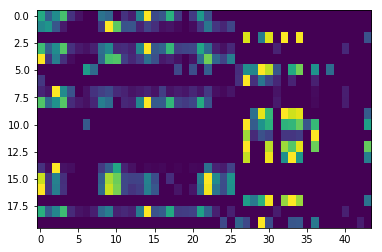

In [6]:
plt.imshow(new_plot,aspect = 'auto')

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(new_plot)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x7f84440d8de8>)

20


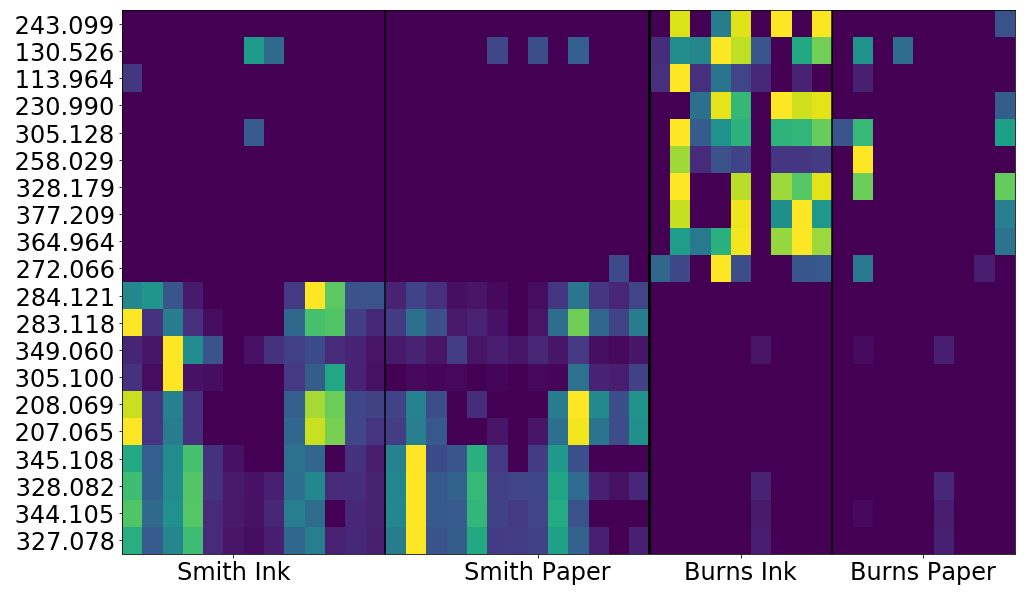

In [19]:
print len(found)
ar = zip(list(ac.labels_),range(len(ac.labels_)))
ar = sorted(ar,key = lambda x: x[0])
_,s_index = zip(*ar)
end_point = len(found)-0.5
plt.figure(figsize=(16,10))
plt.imshow(new_plot[s_index,:],aspect='auto')
plt.plot([12.5,12.5],[-0.5,end_point],'k')
plt.plot([25.5,25.5],[-0.5,end_point],'k',linewidth=3)
plt.plot([34.5,34.5],[-0.5,end_point],'k')

#re-order the found values
ordered_found = []
for i in s_index:
    ordered_found.append(found[i])

plt.yticks(range(len(found)),["{:8.3f}".format(float(f)) for f in ordered_found],fontsize = 24)
plt.xticks([5,20,30,39],('Smith Ink','Smith Paper','Burns Ink','Burns Paper'),fontsize=24)
plt.savefig('heatplotexample.png')
plt.savefig('heatplotexample.pdf')

Now match the Goldsmith peaks

In [10]:
goldsmith_data = {}
with open('spreadsheets/goldsmith/goldsmith_log_1e-05_tus.csv','r') as f:
    reader = csv.reader(f)
    heads = reader.next()
    for line in reader:
        goldsmith_data[line[0]] = line

In [25]:
gData = np.zeros((len(found),4),np.double)
for i,m in enumerate(ordered_found):
    mz = float(m)
    best = None
    ee = 1e6
    for gmz in goldsmith_data:
        gmzf = float(gmz)
        e = 1e6*abs(mz-gmzf)/mz
        if e < ee:
            best = gmz
            ee = e
    if ee < 5:
        td = goldsmith_data[best][1:5]
        td = [0.0 if t == 'nan' else t for t in td]
        gData[i,:] = td



[[ 0.          0.          0.          0.        ]
 [ 0.          0.37983109  0.          0.55991934]
 [ 0.          0.23155526  0.          0.        ]
 [ 0.          0.27396869  0.42602245  0.        ]
 [ 0.          0.          0.          0.9801324 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.41405523]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14147716]
 [ 0.          0.28002301  0.          0.88993835]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.28706134  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.  

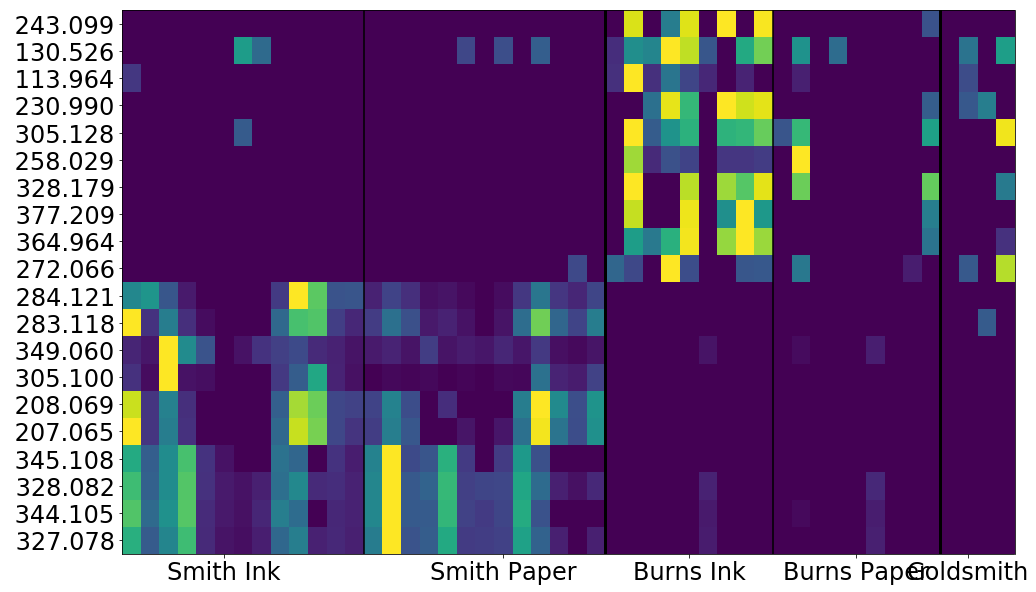

In [33]:
plt.figure(figsize=(16,10))
plt.imshow(np.hstack((new_plot[s_index,:],gData)),aspect='auto')
plt.plot([12.5,12.5],[-0.5,end_point],'k')
plt.plot([25.5,25.5],[-0.5,end_point],'k',linewidth=3)
plt.plot([34.5,34.5],[-0.5,end_point],'k')

plt.plot([43.5,43.5],[-0.5,end_point],'k',linewidth=3)

#re-order the found values
ordered_found = []
for i in s_index:
    ordered_found.append(found[i])

plt.yticks(range(len(found)),["{:8.3f}".format(float(f)) for f in ordered_found],fontsize = 24)
plt.xticks([5,20,30,39,45],('Smith Ink','Smith Paper','Burns Ink','Burns Paper','Goldsmith'),fontsize=24)
plt.savefig('heatplotexample_g.png')
plt.savefig('heatplotexample_g.pdf')